# LOAN CUSTOMER ANALYSIS DASHBOARD

The objective of this topic is creating a dashboard that focuses on analyzing loan customer data. It aims to provide valuable insights, metrics, and visualizations that can support decision-making processes and facilitate the monitoring of loan portfolios.

# 1 - Introduction

My name is **Ahmad Luay Adnani**. As a highly enthusiastic and goal-oriented Data Scientist with a background in Civil Engineering, I bring a unique combination of technical expertise and analytical skills to the table. My education at the Institut Teknologi Sepuluh Nopember, passion for utilizing data to drive solutions, and commitment to continuous learning and growth have honed my strong organizational abilities, teamwork orientation, and exceptional problem-solving skills. With a data-driven approach and a determined mindset, I am eager to leverage my analytical mindset and technical knowledge to make a significant impact as a Data Analyst/Data Scientist. I am confident in my ability to excel in this field and tackle any challenges that arise while remaining focused on achieving my goals.

# 2 - Working Area

Working Area contains the process of importing libraries, Data Loading, Exploratory Data Analysis, and Data Cleaning

## 2.1 Import Libraries

This section explains how to import the libraries that will be used in this notebook.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# handling outliers
from feature_engine.outliers import Winsorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# library version
print('pandas version :',(pd.__version__))
print('numpy version :',(np.__version__))
print('matplotlib version :',(matplotlib.__version__))
print('seaborn version :',(sns.__version__))    

pandas version : 1.5.3
numpy version : 1.22.3
matplotlib version : 3.7.1
seaborn version : 0.12.2


## 2.2 Data Loading

This section explains the process of data loading. Dataset provided by Lion Parcel.

In [3]:
# data loading
df = pd.read_csv('lion-loan-train.csv')

# Displaying the top 10 rows of the dataset
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Following are the variables and definitions of each column in the dataset.

| Column | Description |
| --- | --- |
| `Loan_ID` | Unique Loan ID |
| `Gender` | Male/ Female |
| `Married` | Applicant married (Y/N) |
| `Dependents` | Number of dependents |
| `Education` | Applicant Education (Graduate/ Under Graduate) |
| `Self_Employed` | Self-employed (Y/N) |
| `ApplicantIncome` | Applicant income |
| `CoapplicantIncome` | Coapplicant income |
| `LoanAmount` | Loan amount in thousands |
| `Loan_Amount_Term` | Term of a loan in months |
| `Credit_History` | credit history meets guidelines |
| `Property_Area` | Urban/ Semi-Urban/ Rural |
| `Loan_Status` | Loan approved (Y/N) |

### Dataset Size
This section explains how to check the size of the dataset.

In [4]:
# size of dataset
df.shape

(614, 13)

### Information
This section explains the information contained in the dataset, including the index, columns, data type, non-null values, and memory usage.

In [5]:
# showing information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Based on information above :

There are missing values in column `Gender`, `Married`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term` and `Credit_History`


### Checking for Duplicated Data


This section explains the process to check for duplicated data in the dataset.

In [6]:
# Check for duplicated entries
df.duplicated().value_counts()

False    614
dtype: int64

There is no duplicated data in this dataset.

## 2.3 Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [7]:
# Descriptive Statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Based on information above :
- `Credit_History` is categorical column

### Loan Status

This section describes the data exploration process to find out the loan status of the customers.

In [8]:
# make a copy of the dataset
df_eda = df.copy()

# Loan_Status
df_eda.Loan_Status.value_counts().to_frame()

,Loan_Status
Y,422
N,192


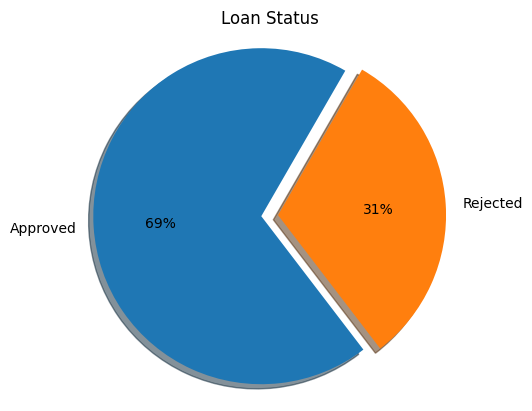

In [9]:
# Create pie chart
labels = 'Approved', 'Rejected'
explode = (0, 0.10)

plt.pie(df_eda.Loan_Status.value_counts(),explode=explode,labels=labels, autopct='%.0f%%',shadow=True,startangle=60)

plt.axis('equal')
plt.title('Loan Status')
plt.show()

Based on the table and visualization above, the percentage of approved loan status is 69%. Further data exploration is needed to find out what causes the loan to be approved.

### Applicant and Co-applicant Income

This section describes the data exploration process to find out average applicant income based on their loan status.

In [10]:
# average applicant income
df_eda.groupby(['Loan_Status']).aggregate(avg_app_income=('ApplicantIncome','mean'),avg_coapp_income=('CoapplicantIncome','mean')).reset_index()

,Loan_Status,avg_app_income,avg_coapp_income
0,N,5446.078125,1877.807292
1,Y,5384.068720,1504.516398


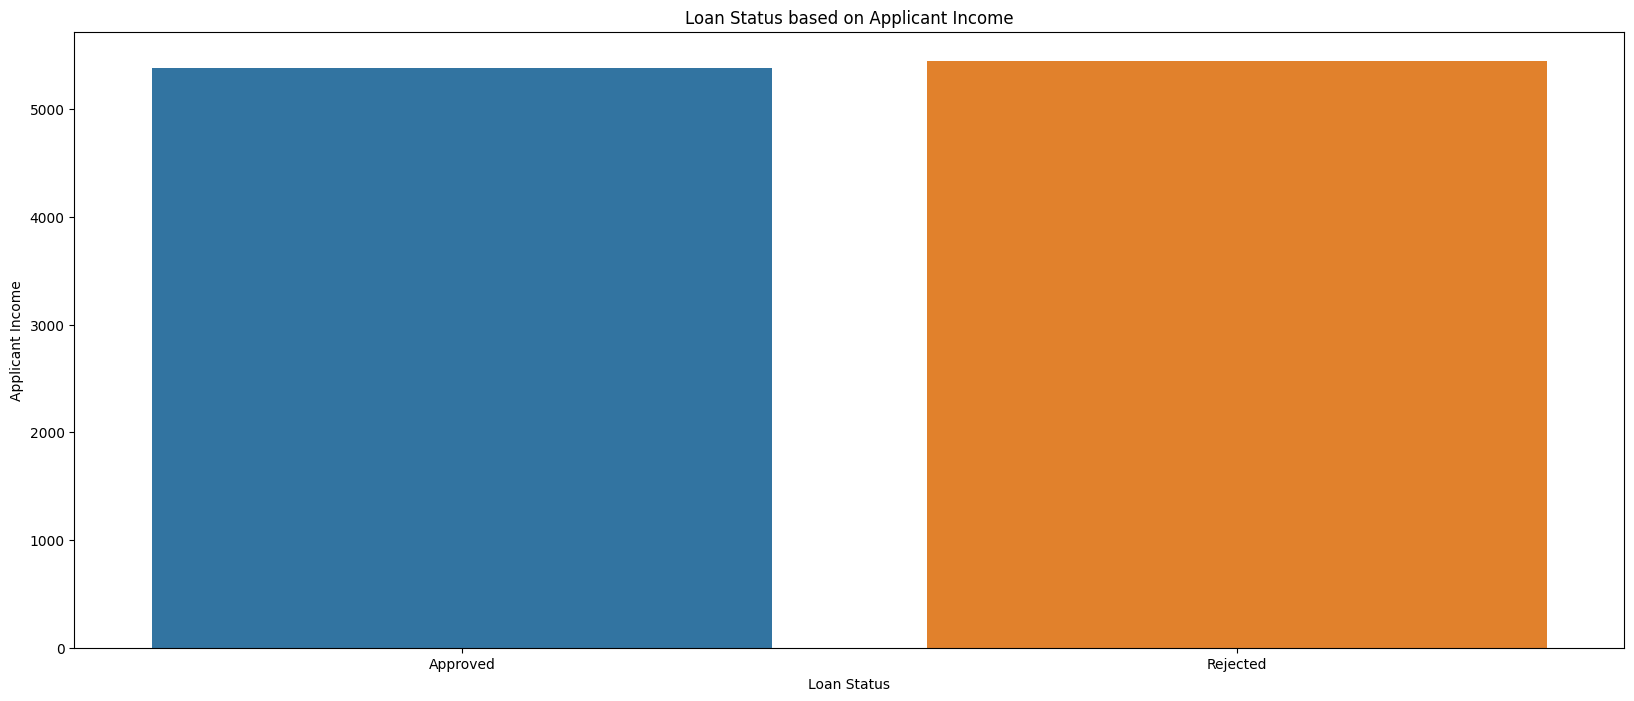

In [11]:
# create bar chart
fig, ax = plt.subplots(figsize=(20, 8))

sns.barplot(data=df_eda,x=df.Loan_Status,y=df.ApplicantIncome,ci=None)

plt.title('Loan Status based on Applicant Income')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks([0,1],['Approved','Rejected'])
plt.show()

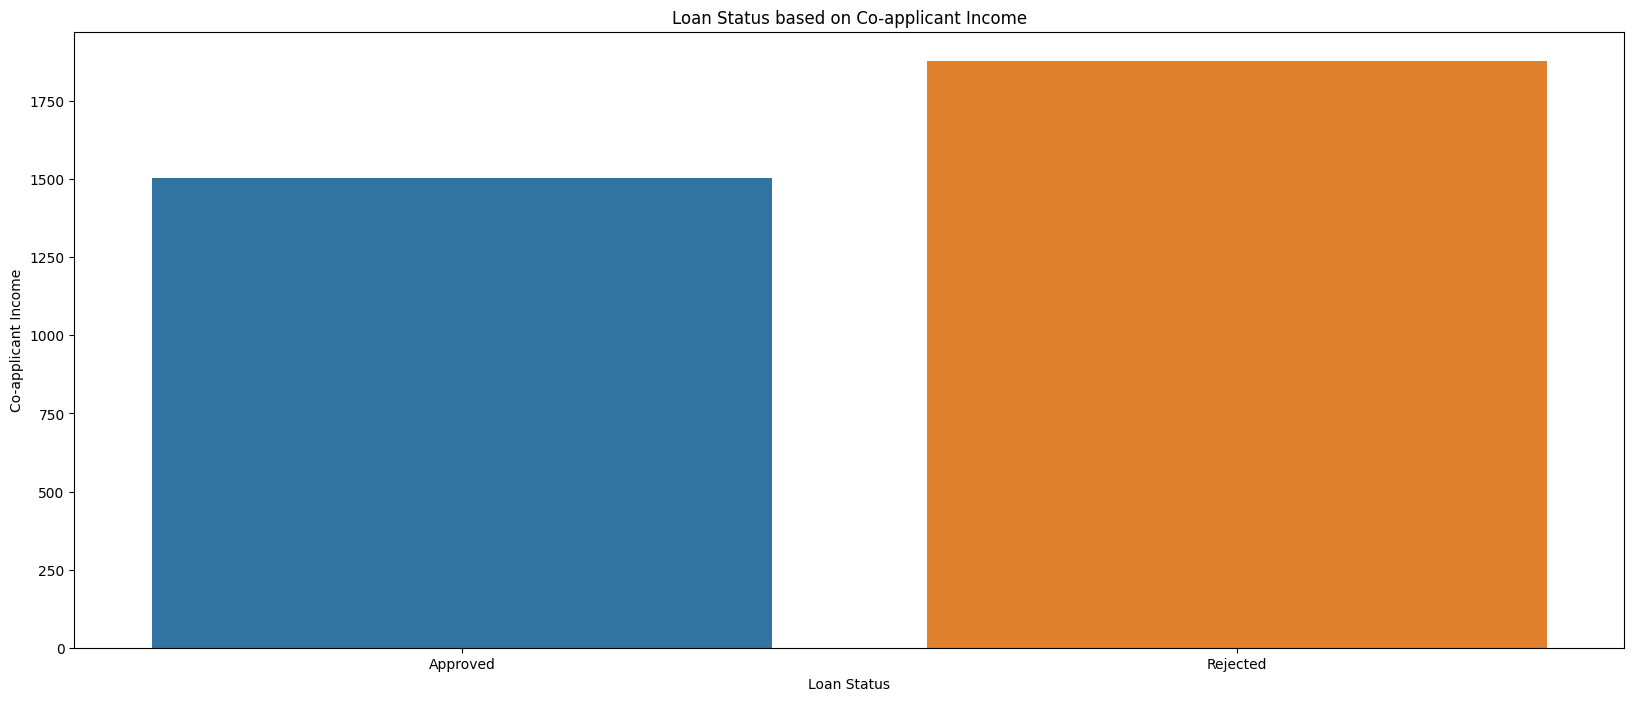

In [12]:
# create bar chart
fig, ax = plt.subplots(figsize=(20, 8))

sns.barplot(data=df_eda,x=df.Loan_Status,y=df.CoapplicantIncome,ci=None)

plt.title('Loan Status based on Co-applicant Income')
plt.xlabel('Loan Status')
plt.ylabel('Co-applicant Income')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks([0,1],['Approved','Rejected'])
plt.show()

Based on the table and visualization above, **"The average income of applicants with a loan status 'rejected' is higher than that of applicants with a loan status 'approved'.**. In general, the loan approval process typically includes an income requirement. However, this requirement is not demonstrated in this dataset, indicating that the applicant's income does not exhibit a strong correlation with loan status.

### Loan Amount

This section describes the data exploration process to find out average loan amount based on their loan status.

In [13]:
# average loan amount
df_eda.groupby(['Loan_Status']).aggregate(avg_loan_amount=('LoanAmount','mean'))

,avg_loan_amount
Loan_Status,
N,151.220994
Y,144.294404


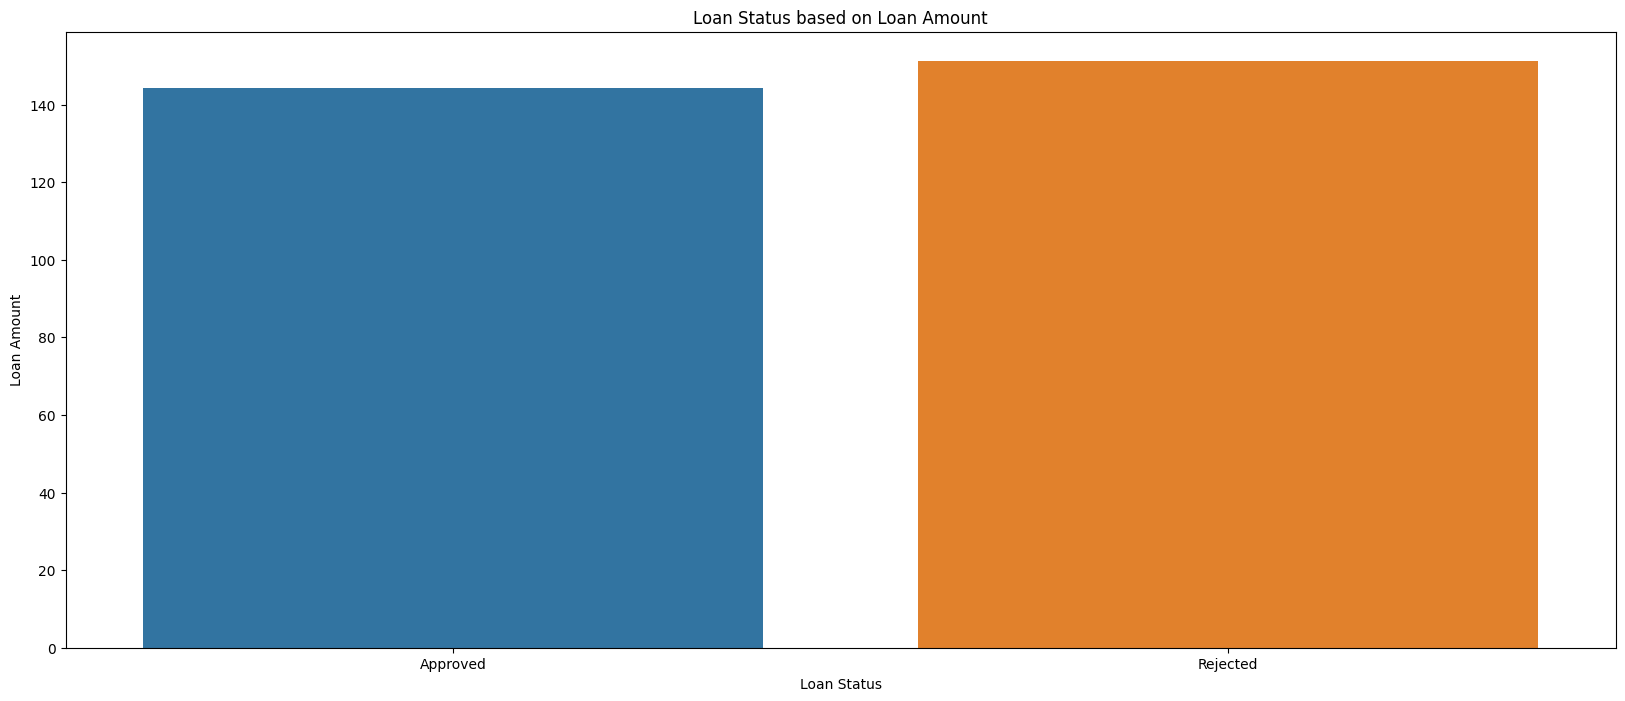

In [14]:
# create bar chart
fig, ax = plt.subplots(figsize=(20, 8))

sns.barplot(data=df_eda,x=df.Loan_Status,y=df.LoanAmount,ci=None)

plt.title('Loan Status based on Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks([0,1],['Approved','Rejected'])
plt.show()

Based on the table and visualization above, **"The average loan amounts with a loan status 'rejected' is higher than average loan amounts with a loan status 'approved'.**. Potential causes for this observation could include:

1. **Risk assessment**: Lenders may have stricter lending criteria for loan approvals, resulting in smaller loan amounts approved for borrowers. On the other hand, loans that are considered riskier or do not meet the necessary criteria may be rejected, leading to higher average loan amounts among the rejected applications.

2. **Creditworthiness and loan amount correlation**: Applicants with higher credit scores or better financial profiles may be more likely to secure loan approvals and qualify for larger loan amounts. Conversely, applicants with lower credit scores or less favorable financial circumstances may face higher rejection rates, resulting in higher average loan amounts among the rejected applications.

### Loan Amount Term

This section describes the data exploration process to find out loan amount term based on their loan status.

In [15]:
# average loan Term
df_eda.groupby(['Loan_Status','Loan_Amount_Term']).aggregate(no_of_loan_term=('Loan_Amount_Term','count'))

no_of_loan_term
Loan_Status Loan_Amount_Term                 
N           36.0                            2
            84.0                            1
            180.0                          15
            240.0                           1
            300.0                           5
            360.0                         153
            480.0                           9
Y           12.0                            1
            60.0                            2
            84.0                            3
            120.0                           3
            180.0                          29
            240.0                           3
            300.0                           8
            360.0                         359
            480.0                           6

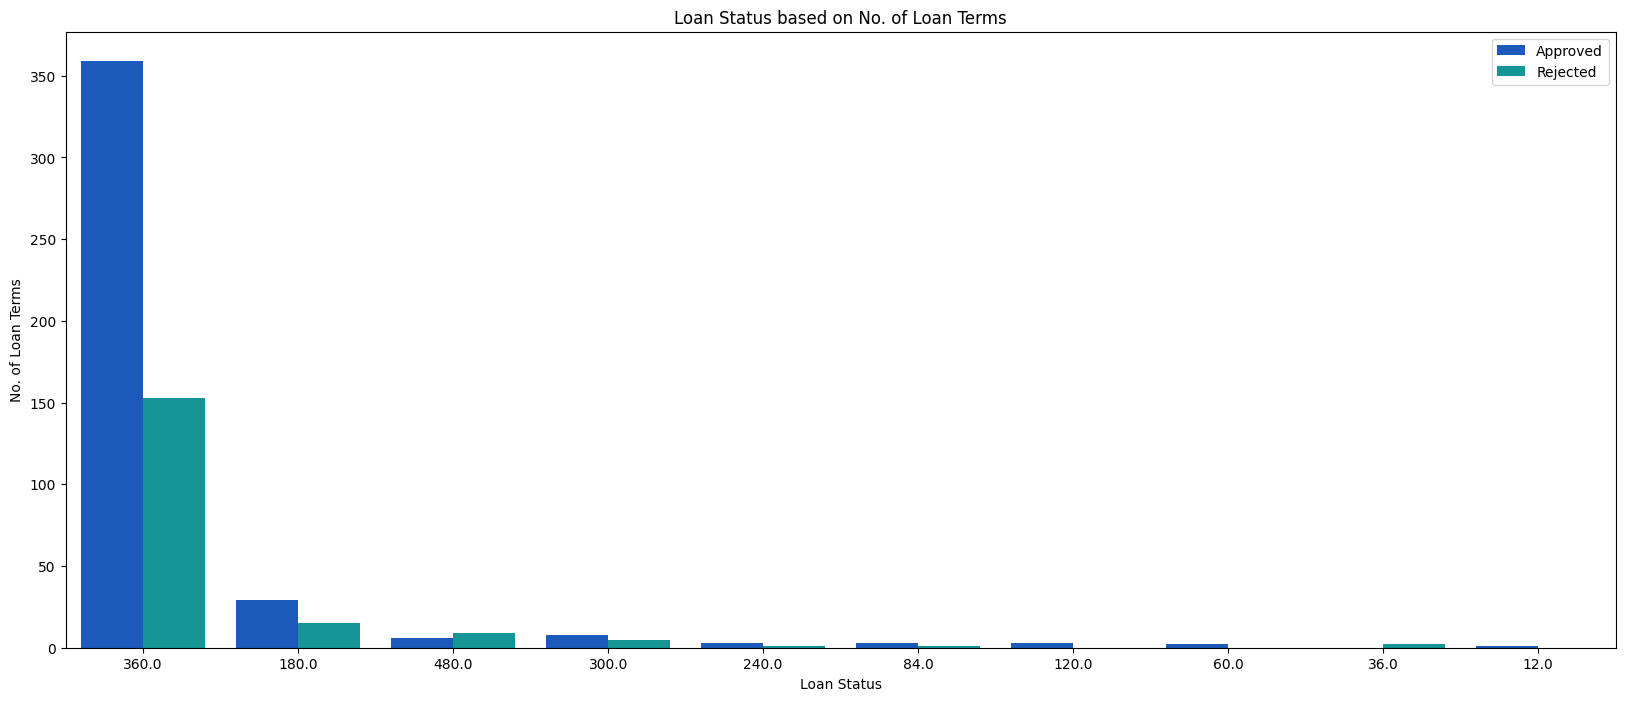

In [16]:
# create bar chart
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(x=df_eda.Loan_Amount_Term, hue=df_eda.Loan_Status,palette='winter',order=df_eda.Loan_Amount_Term.value_counts().index)

plt.title('Loan Status based on No. of Loan Terms')
plt.xlabel('Loan Status')
plt.ylabel('No. of Loan Terms')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(loc='upper right',labels=['Approved','Rejected'])
plt.show()

Based on the table and visualization above, **"Most loan applicants apply for long-term loans, and there is no correlation between the loan term and loan status.**. The cause behind these observations can be attributed to various factors:
1. Borrower preferences: Many loan applicants may opt for long-term loans because they prefer lower monthly payments and an extended repayment period. This choice might be based on their financial situation, income stability, or personal preferences.

2. Loan evaluation criteria: Lenders may evaluate loan applications based on factors other than the loan term, such as creditworthiness, income, and debt-to-income ratio. These criteria could have a stronger impact on loan approval decisions compared to the chosen loan term, resulting in no discernible correlation between the two.

3. Loan availability: Lenders may offer a wide range of loan terms to cater to diverse borrower needs. This availability of different loan terms can lead to loan applicants selecting various terms based on their individual circumstances, resulting in no clear correlation between the loan term and loan status.

### Credit History

This section describes the data exploration process to find out how many loan applicants meet the credit history guidelines.

In [17]:
# Loan Status by Credit History
df.groupby(by=['Credit_History','Loan_Status']).aggregate({'Loan_Status':'count'})

Loan_Status
Credit_History Loan_Status             
0.0            N                     82
               Y                      7
1.0            N                     97
               Y                    378

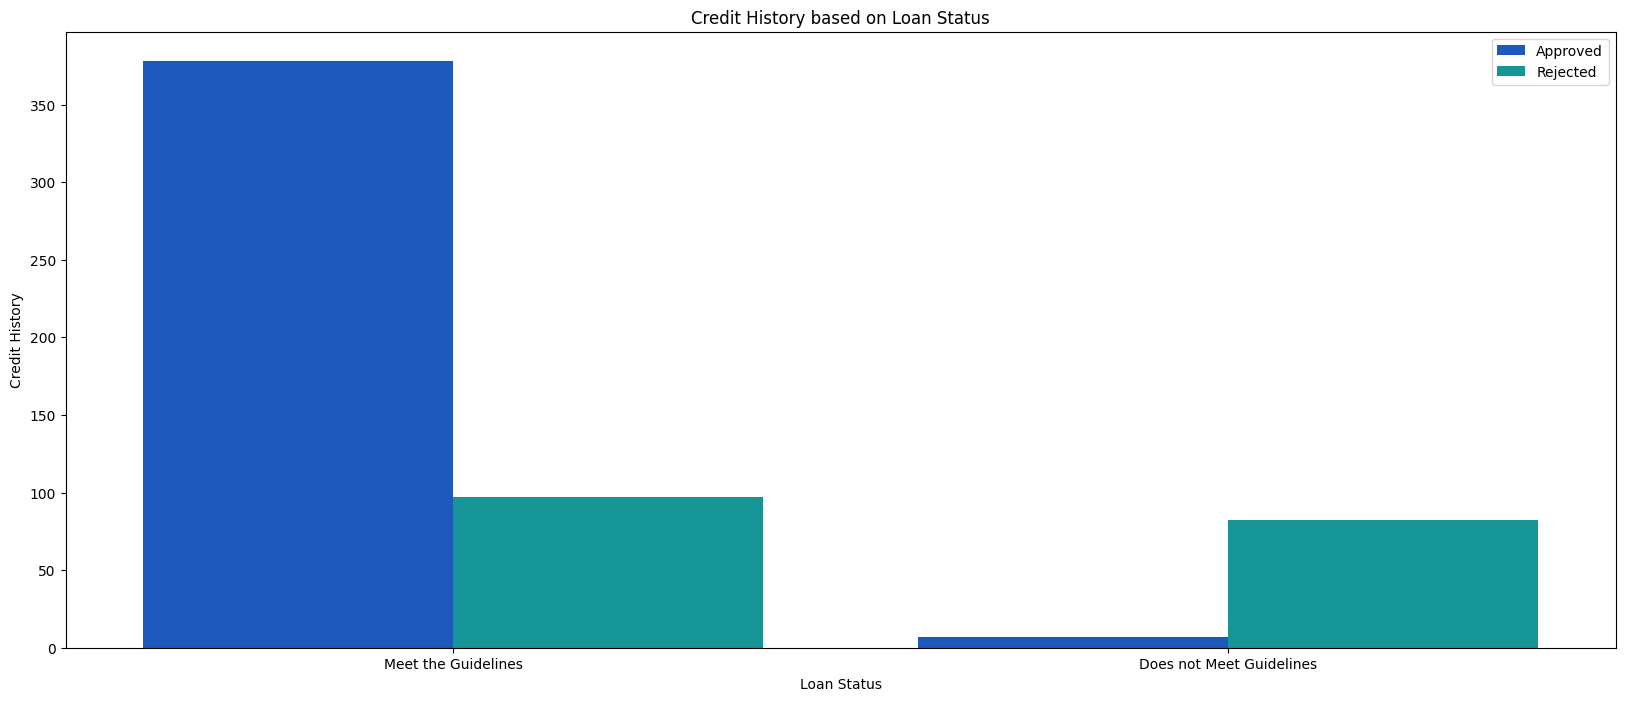

In [18]:
# create bar chart
fig, ax = plt.subplots(figsize=(20, 8))

sns.countplot(x=df.Credit_History, hue=df.Loan_Status,palette='winter',order=df.Credit_History.value_counts().index)

plt.title('Credit History based on Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit History')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(loc='upper right',labels=['Approved','Rejected'])
plt.xticks([0,1],['Meet the Guidelines','Does not Meet Guidelines'])
plt.show()

Based on the table and visualization above, **The majority of loan applicants have their loan status approved because they have a credit history that meets the guidelines.**. This suggests that having a credit history that meets the guidelines is a key factor in the loan approval process. It implies that the lenders or financial institutions evaluating the loan applications consider a satisfactory credit history as an important criterion for granting loan approvals.

# 2.4 Data Cleaning

This section explains the process of data cleaning, such as checks whether the column type is a numeric column or a categorical column, check the distribution of data, handling missing values, and handling outliers.

### Numerical and Categorical Column

In this section, the column type is checked whether it is a numeric column or a categorical column. "The 'Credit History' column was changed from 'float' to 'string' due to binary classification.

In [19]:
df_copy = df.copy()

# Convert Credit_History into strings
df_copy['Credit_History'] = df['Credit_History'].astype(str)

# Get Numerical Columns and Categorical Columns
num_columns = df_copy.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_copy.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
Categorical Columns :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']


### Check the distribution of data

In this section, we examine the shape of the data distribution, checking for normal distribution or skewness.

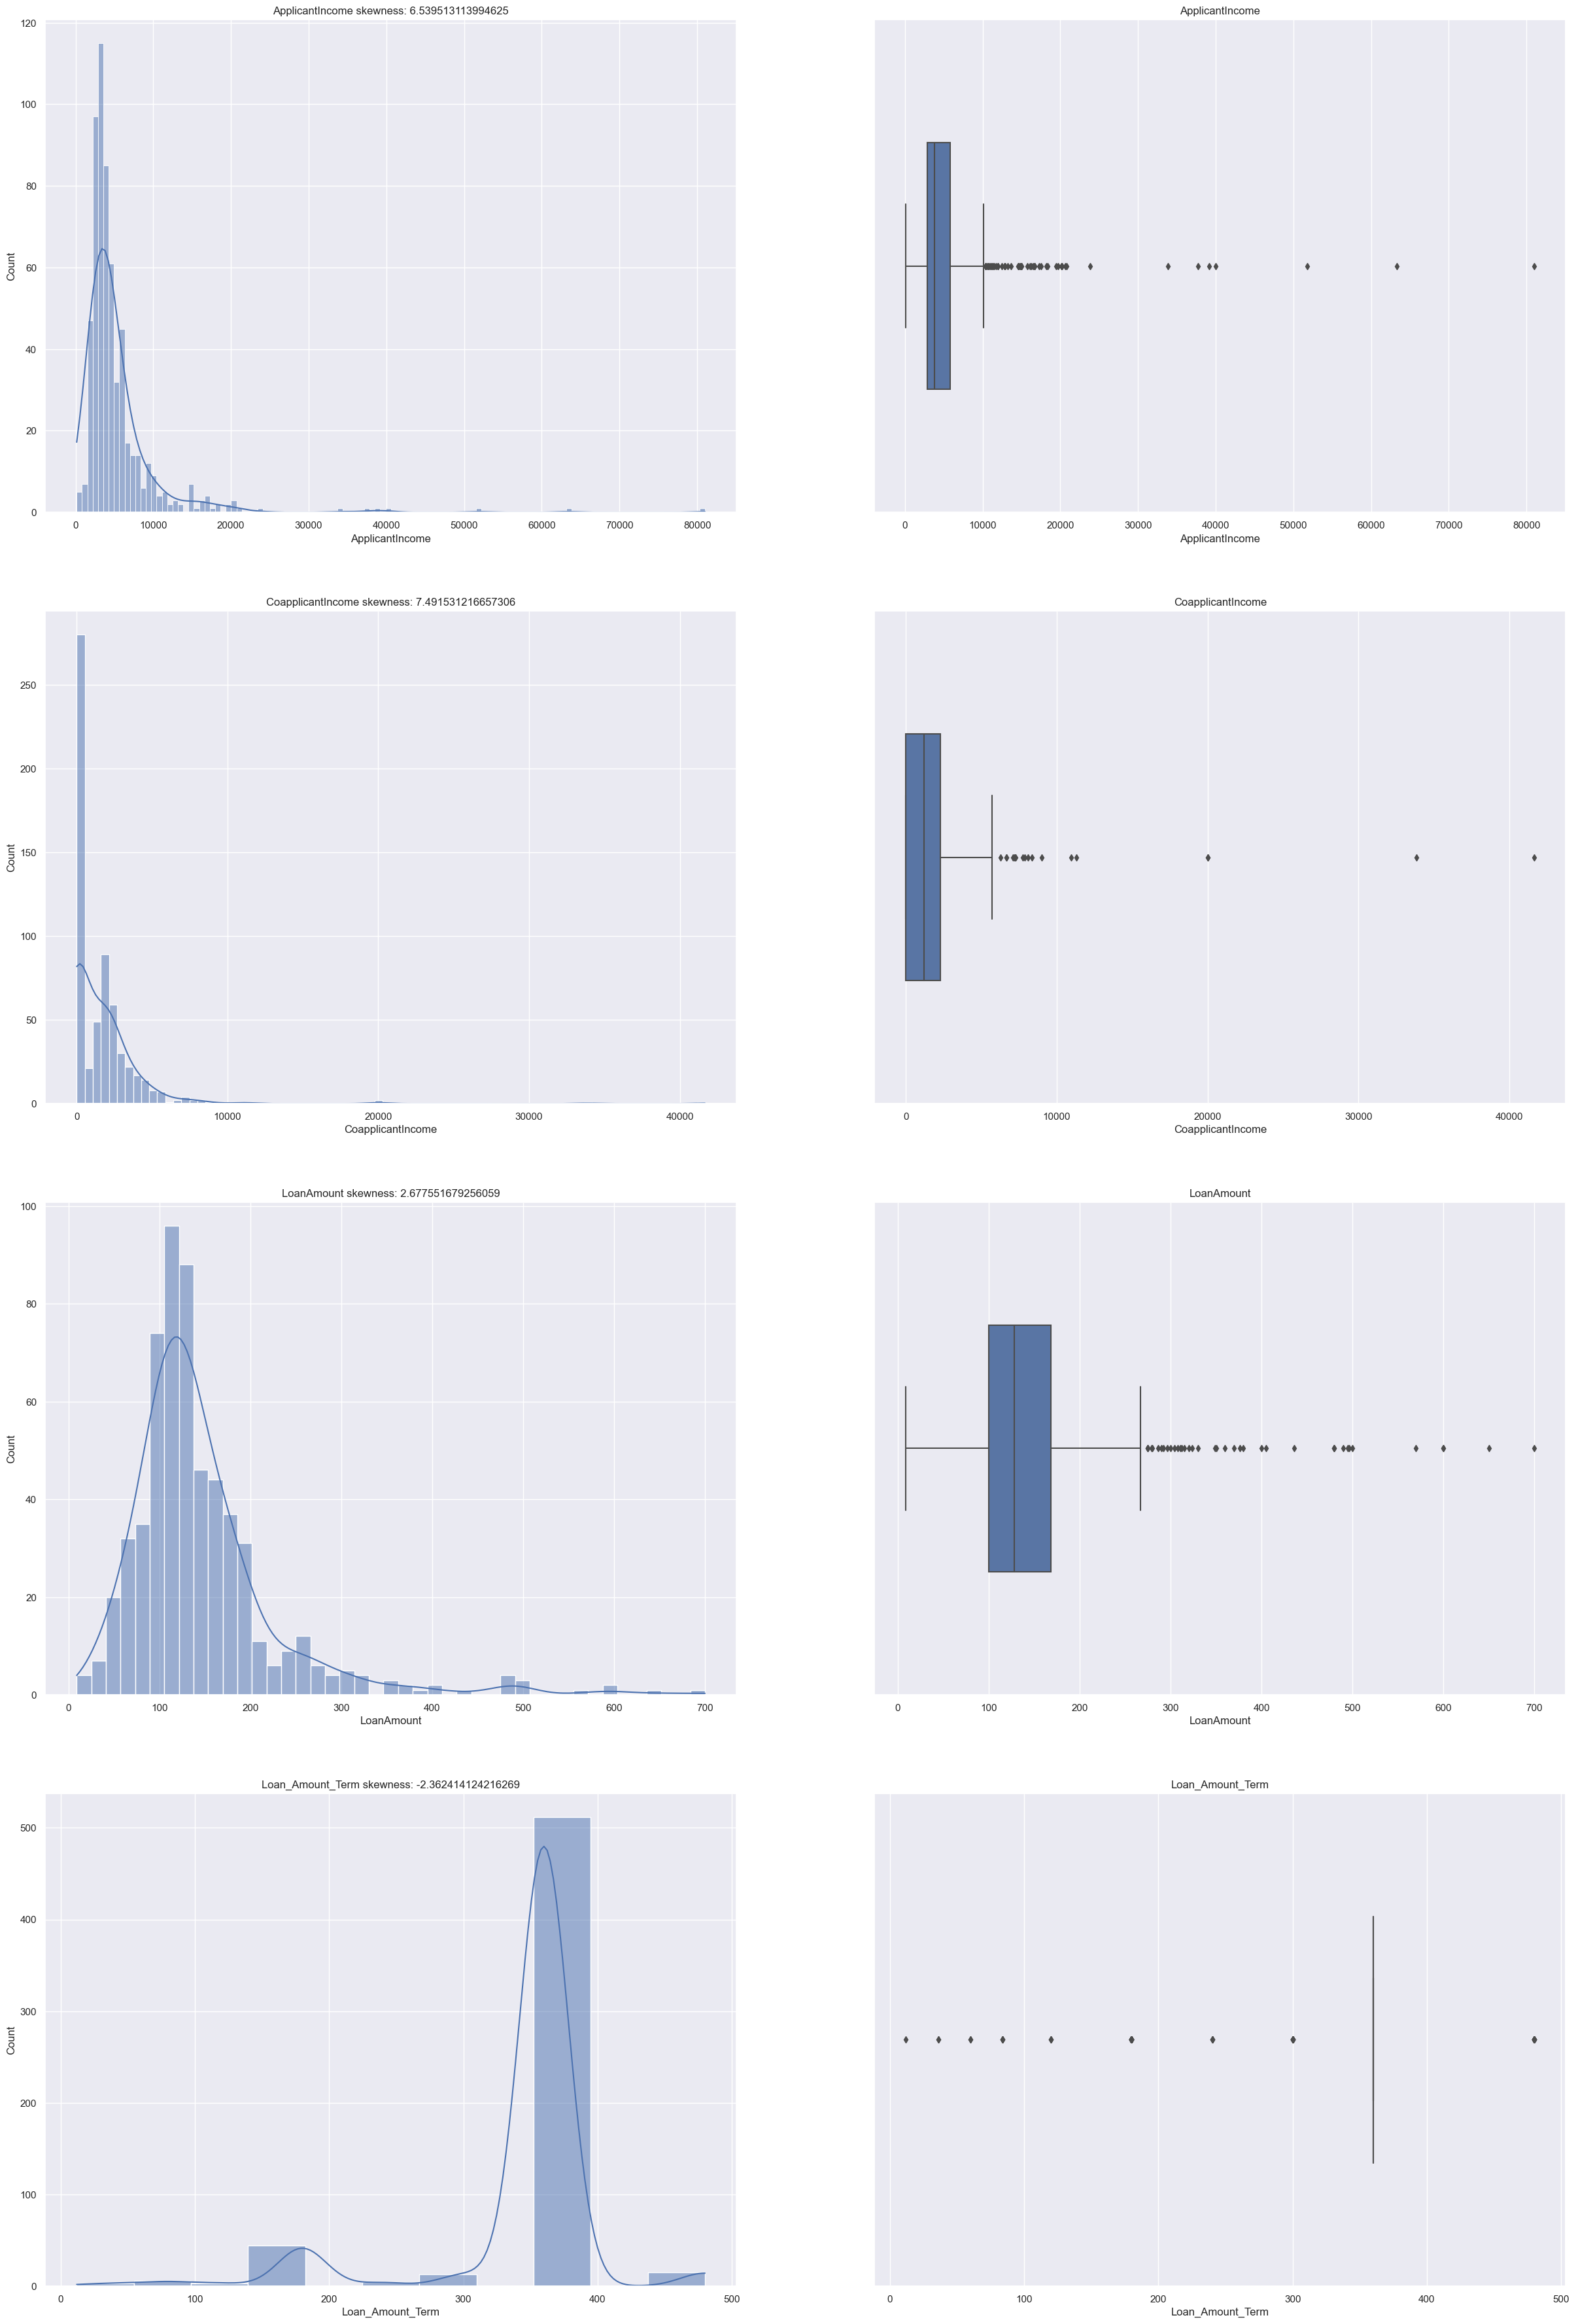

In [20]:
# plot histogram and boxplot
df_copy_num = df_copy[num_columns]
n=len(df_copy_num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n,2,figsize=(30,45))
for i in range(n):
    col = df_copy_num.columns[i]
    sns.histplot(ax=ax[i,0],data=df_copy_num[col],kde=True)
    ax[i,0].set_title(f'{col} skewness: {df_copy_num[col].skew()}')
    sns.boxplot(ax=ax[i,1],data=df_copy_num,x=df_copy_num[col],width=0.50)
    ax[i,1].set_title(col)

Based on the visualization above, it is evident that all columns are not normally distributed (skewed).

### Handling Missing Values

This section contains the process of handling missing values. The handling of missing values will be done through imputation.

In [21]:
# check for missing value
df_copy.isnull().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### Numerical Columns

In the numerical column, missing values are handled by imputing the median value due to the data distribution is not **normally distributed (skew)**. Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.

**a. Loan Amount**

In [22]:
# Loan Amount (skewness = 2.68)
# Skewness > 1 = right-skewwed, replacing the missing data with median
df_copy['LoanAmount'] = df_copy['LoanAmount'].fillna(df_copy['LoanAmount'].median())

**b. Loan Amount Term**

In [23]:
# Loan Amount Term (skewness = -2.36)
# Skewness < 1 = Left-skewwed, replacing the missing data with median
df_copy['Loan_Amount_Term'] = df_copy['Loan_Amount_Term'].fillna(df_copy['Loan_Amount_Term'].median())

#### Categorical Columns

Because the data is **Missing Completely at Random (MCRA)**, missing values are handled by imputing the mode value for variables with a missing value less than 5%, while for variables with a missing value greater than 5%, a new category called 'unknown' is imputed.

**a. Gender**

In [24]:
# most frequent category for 'Gender'
df_copy['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [25]:
# fill missing values with most frequent category
df_copy['Gender'].fillna('Male', inplace=True)

**b. Married**

In [26]:
# most frequent category for 'Married'
df_copy['Married'].mode()

0    Yes
Name: Married, dtype: object

In [27]:
# fill missing values with most frequent category
df_copy['Married'].fillna('Yes', inplace=True)

**c. Dependents**

In [28]:
# most frequent category for 'Dependents'
df_copy['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [29]:
# fill missing values with most frequent category
df_copy['Dependents'].fillna('0', inplace=True)

**d. Self Employed**

In [30]:
# fill missing values with most 'Unknown' ( missing data > 5% )
df_copy['Self_Employed'].fillna('Unknown', inplace=True)

In [31]:
# check for missing value
df_copy.isnull().mean()

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

#### Handling Outliers

This section explains how to handle outliers in the data set.

In [32]:
# Create Function
def outlier_analysis(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df[col].mean() + 3*X_train[col].std()
    lower = df[col].mean() - 3*X_train[col].std()
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
  no_outliers = df[(df[col]>=lower) &  (df[col]<=upper)]
  outliers = df[(df[col]>upper ) | (df[col]<lower) ]

  return outliers,no_outliers, upper, lower

In [33]:
# percentage of outlier in the dataset
num = df_copy_num
n=len(num.columns)

for i in range(n):
    col = num.columns[i]
    out,no_out, up, low = outlier_analysis (df_copy,col)
    print(f'column name: {col}')
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(df_copy))*100, '%') 
    print('-'*20)

column name: ApplicantIncome
count of outlier:  50
percentage of outlier:  8.143322475570033 %
--------------------
column name: CoapplicantIncome
count of outlier:  18
percentage of outlier:  2.9315960912052117 %
--------------------
column name: LoanAmount
count of outlier:  41
percentage of outlier:  6.677524429967427 %
--------------------
column name: Loan_Amount_Term
count of outlier:  88
percentage of outlier:  14.332247557003258 %
--------------------


Because there are too many outliers, outlier handling is done using the Capping Method with `Winsorizer` library. Because there are too many outliers in `Loan_Amount_Term`, the outliers in that column will be ignored

In [34]:
# create a copy
df_cap = df_copy.copy()

# Drop variable 'Loan_Amount_Term' because there are too many outliers
df_cap = df_cap.drop(['Loan_Amount_Term'],axis=1)

# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
wins.fit(df_cap)
df_cap = wins.transform(df_cap)

In [35]:
df_loan = df_copy['Loan_Amount_Term']
# Concatenate the dataset after handling outliers with the dropped variable (Loan_Amount_Term)
df_final = pd.concat([df_cap,df_loan],axis=1)

# rearrange columns
df_final = df_final[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']]

# removing decimals
df_final[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = df_final[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].astype(int)

# save dataset
df_final.to_csv('dataset_final.csv')

df_final.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,261,360,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,10171,5743,261,360,1.0,Semiurban,N


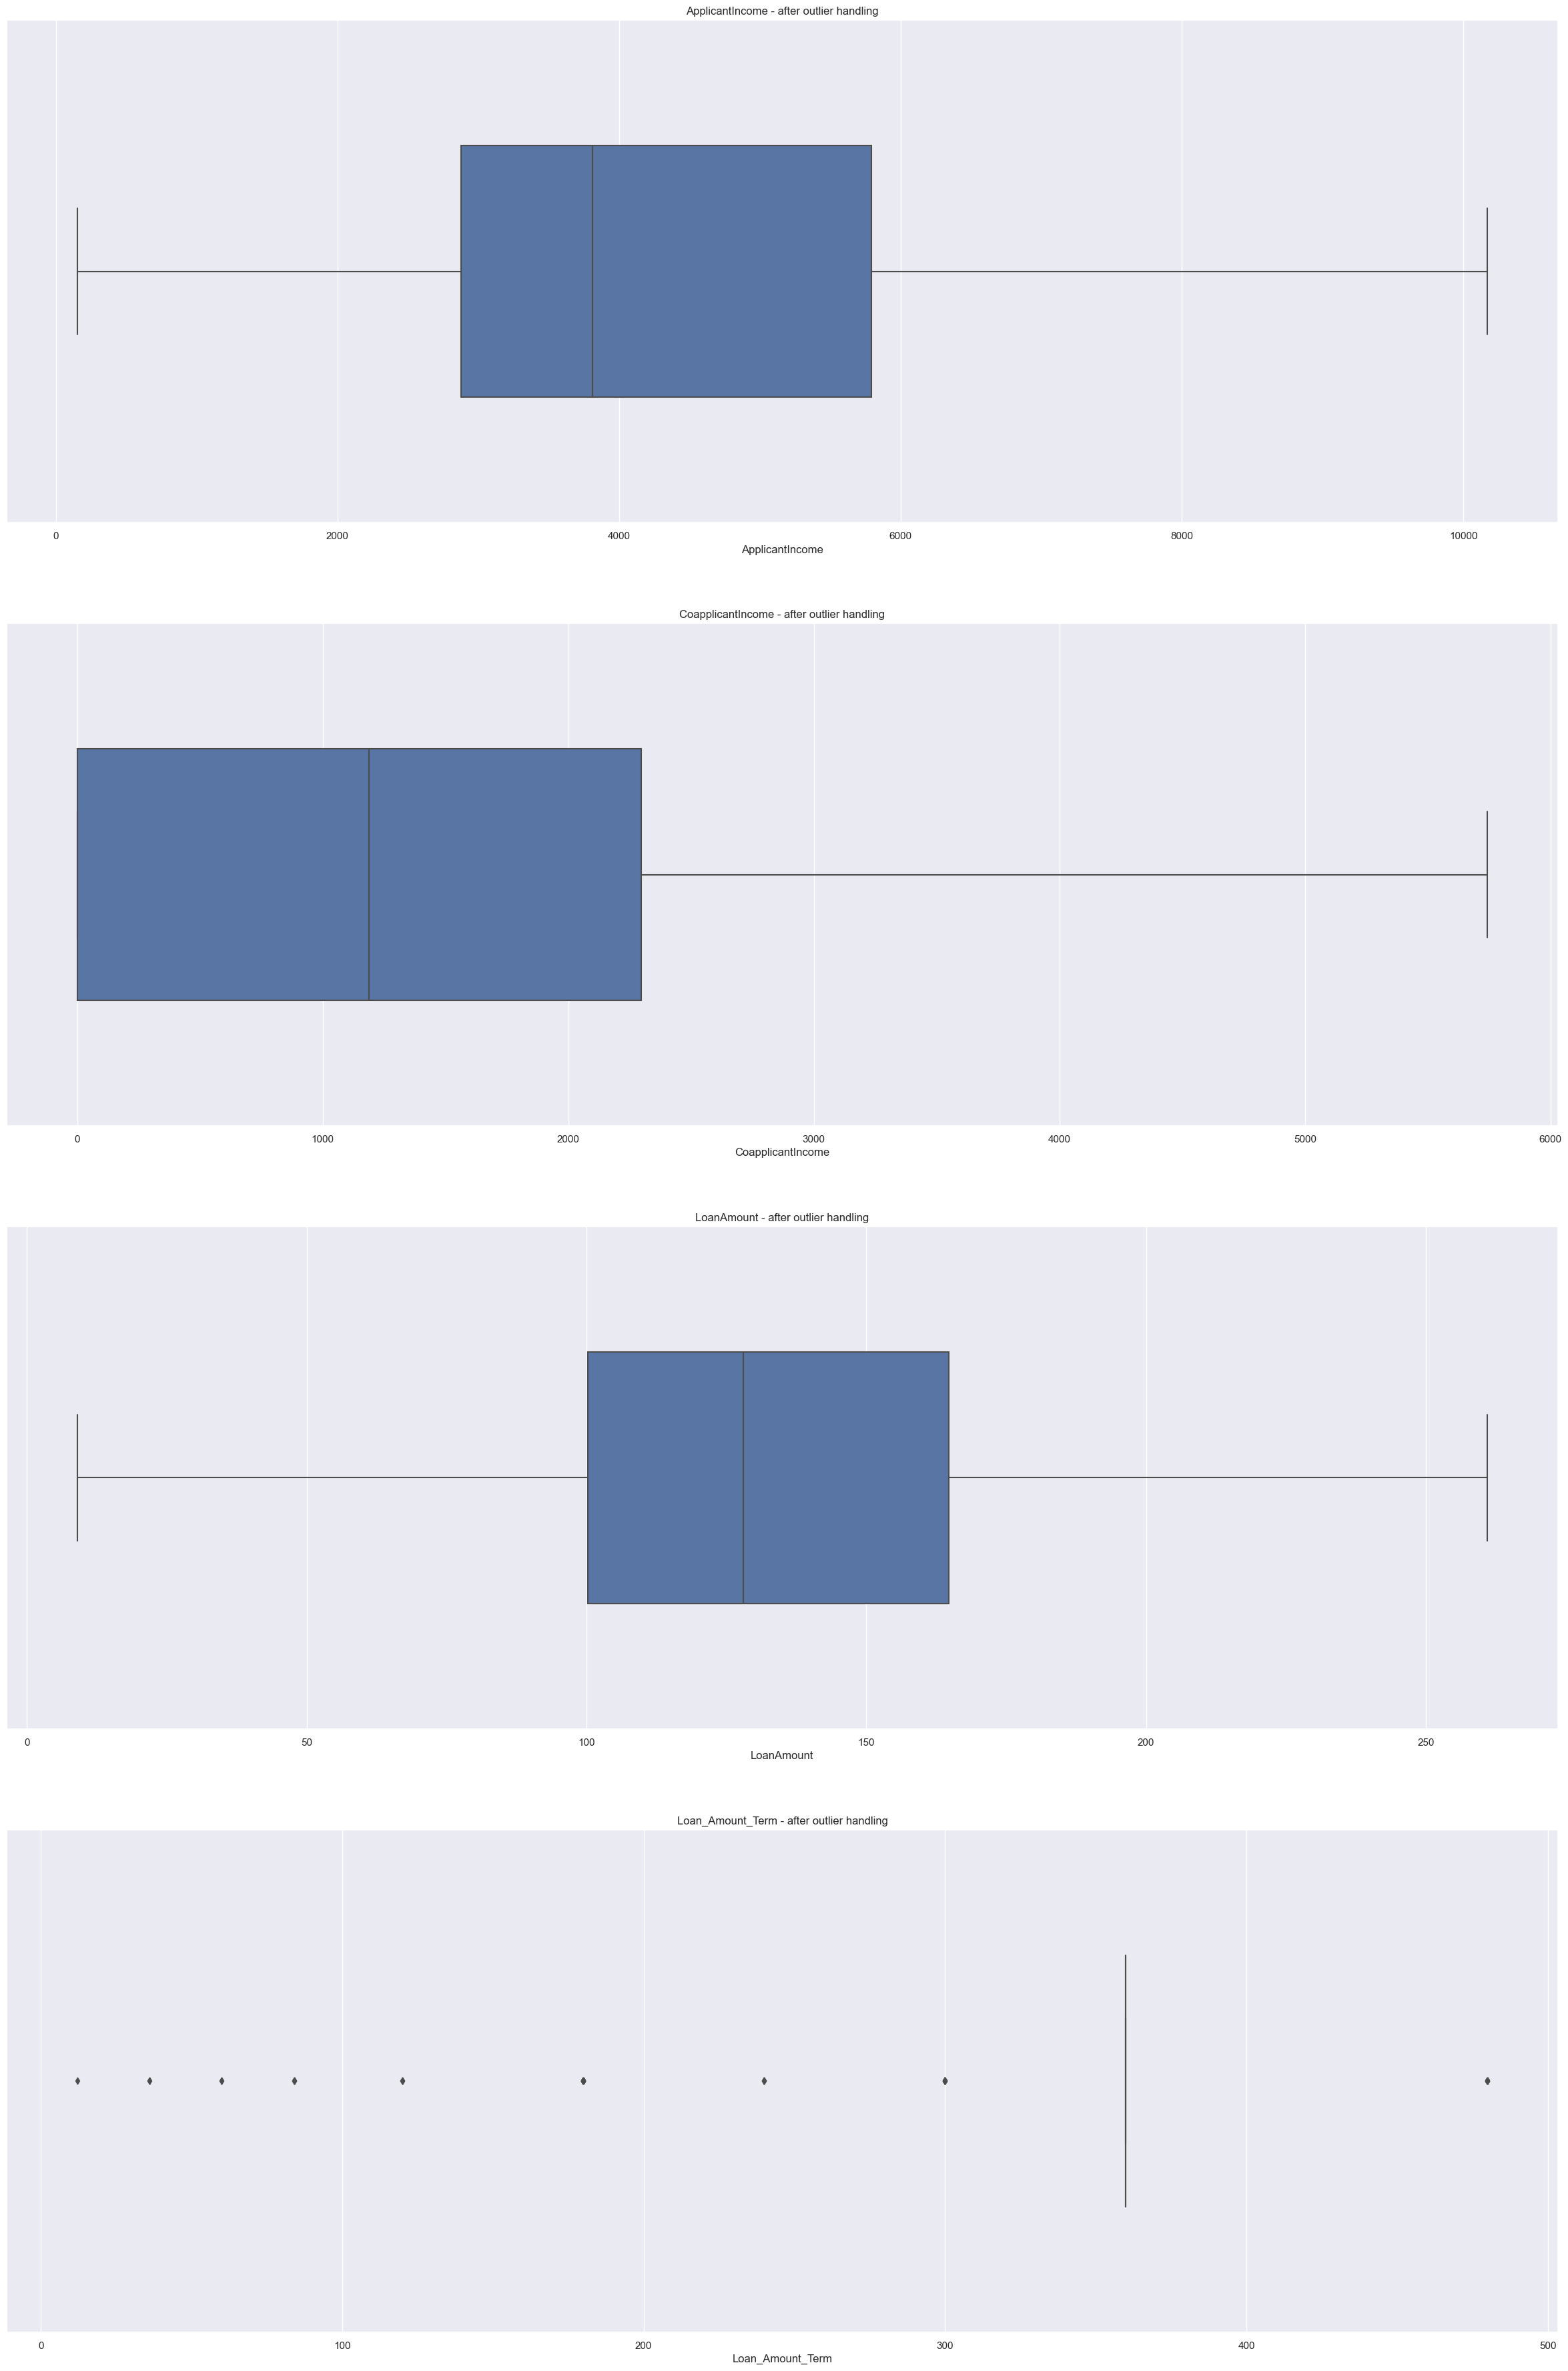

In [36]:
# Boxplot visualization
df_final_num = df_final[num_columns]
n=len(df_final_num.columns)
fig, ax = plt.subplots(n,1,figsize=(30,45))
for i in range(n):
    col = num.columns[i]
    sns.boxplot(ax=ax[i],data=df_final,x=df_final[col],width=0.50)
    ax[i].set_title(f'{col} - after outlier handling')

## 2.5 Data Visualization

Data visualization is done after the data cleaning process. The visualization is created with Microsoft Power BI. The dashboard is located in the same folder as this notebook.

# 3 - Conclusion 

This section contains the conclusions of the analysis that has been carried out.

1. Based on Exploratory Data Analysis:
- The percentage of approved loan status is 69%. Further data exploration is needed to find out what causes the loan to be approved.
- The applicant's income does not exhibit a strong correlation with loan status.
- Having a credit history that meets the guidelines is a key factor in the loan approval process. It implies that the lenders or financial institutions evaluating the loan applications consider a satisfactory credit history as an important criterion for granting loan approvals.

2. Further Improvement: :
- By profiling customers based on their loan data, we can identify key characteristics and patterns that contribute to loan performance, allowing us to make informed decisions and tailor strategies to specific customer segments.